<a href="https://colab.research.google.com/github/SureshThedatanerd/predicting-critical-parameters-of-a-blast-furnace-using-machine-learning/blob/main/Copy_of_Copy_of_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta
import pickle

In [ ]:
data= "co_co2.csv"
df = pd.read_csv(data)

In [ ]:
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])
df['DATE_TIME'] = df['DATE_TIME'].apply(lambda x: x.timestamp())

In [ ]:
df

,DATE_TIME,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,...,TOP_PRESS_1,H2,SKIN_TEMP_AVG,CO,CO2,CO/CO2 RATIO,CO/CO2_RATIO_AFTER_1_HOUR,CO/CO2_RATIO_AFTER_2_HOURS,CO/CO2_RATIO_AFTER_3_HOURS,CO/CO2_RATIO_AFTER_4_HOURS
0,1.609978e+09,311727,3.15,129,4,213,3.34,3.20,7296.0,23.08,...,2,3.88,69.9,22.22,21.00,1.058095,1.059524,1.057183,1.052855,1.063619
1,1.609979e+09,315163,3.16,129,4,209,3.35,3.20,7829.0,23.08,...,1,3.94,71.5,22.56,21.00,1.074286,1.054028,1.046161,1.050472,1.058491
2,1.609979e+09,314595,3.16,128,4,205,3.35,3.21,7904.0,23.08,...,1,3.94,70.6,22.49,21.08,1.066888,1.058019,1.056524,1.057237,1.053227
3,1.609980e+09,312465,3.16,127,4,200,3.35,3.21,7919.0,23.08,...,1,3.99,70.2,22.36,21.13,1.058211,1.068949,1.059849,1.047798,1.064272
4,1.609981e+09,302981,3.11,126,4,194,3.29,3.16,7938.0,23.08,...,1,4.10,70.7,22.25,21.30,1.044601,1.066888,1.054041,1.049906,1.069162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25400,1.640992e+09,278198,2.75,76,2,189,2.92,2.79,2628.0,22.25,...,1,3.10,65.9,21.90,20.25,1.081481,NaN,NaN,NaN,NaN
25401,1.640993e+09,286486,2.80,77,1,190,2.97,2.84,2590.0,22.22,...,1,3.04,64.3,22.09,20.14,1.096822,NaN,NaN,NaN,NaN
25402,1.640993e+09,284500,2.81,77,0,191,2.98,2.85,2592.0,22.20,...,1,2.99,64.3,22.04,20.20,1.091089,NaN,NaN,NaN,NaN
25403,1.640994e+09,284455,2.83,77,1,190,3.00,2.87,2582.0,22.21,...,1,3.09,63.5,22.03,20.27,1.086828,NaN,NaN,NaN,NaN


In [ ]:
X = df[['DATE_TIME', 'CB_FLOW', 'CB_PRESS', 'CB_TEMP', 'STEAM_FLOW', 'STEAM_TEMP', 'STEAM_PRESS','O2_PRESS', 'O2_FLOW', 'O2_PER', 'PCI', 'ATM_HUMID', 'HB_TEMP', 'HB_PRESS', 'TOP_PRESS','TOP_TEMP1', 'TOP_SPRAY', 'TOP_TEMP', 'TOP_PRESS_1', 'H2', 'CO', 'CO2']]
y=df[['CO/CO2 RATIO','CO/CO2_RATIO_AFTER_1_HOUR','CO/CO2_RATIO_AFTER_2_HOURS','CO/CO2_RATIO_AFTER_3_HOURS','CO/CO2_RATIO_AFTER_4_HOURS']]

In [ ]:
column_median= df['CO/CO2_RATIO_AFTER_1_HOUR'].median()
df['CO/CO2_RATIO_AFTER_1_HOUR'].fillna(column_median, inplace=True)
column_median1 = df['CO/CO2_RATIO_AFTER_2_HOURS'].median()
df['CO/CO2_RATIO_AFTER_2_HOURS'].fillna(column_median1, inplace=True)
column_median2 = df['CO/CO2_RATIO_AFTER_3_HOURS'].median()
df['CO/CO2_RATIO_AFTER_3_HOURS'].fillna(column_median2, inplace=True)
column_median3 = df['CO/CO2_RATIO_AFTER_4_HOURS'].median()
df['CO/CO2_RATIO_AFTER_4_HOURS'].fillna(column_median3, inplace=True)

In [ ]:
y

,CO/CO2 RATIO,CO/CO2_RATIO_AFTER_1_HOUR,CO/CO2_RATIO_AFTER_2_HOURS,CO/CO2_RATIO_AFTER_3_HOURS,CO/CO2_RATIO_AFTER_4_HOURS
0,1.058095,1.059524,1.057183,1.052855,1.063619
1,1.074286,1.054028,1.046161,1.050472,1.058491
2,1.066888,1.058019,1.056524,1.057237,1.053227
3,1.058211,1.068949,1.059849,1.047798,1.064272
4,1.044601,1.066888,1.054041,1.049906,1.069162
...,...,...,...,...,...
25400,1.081481,1.093035,1.093046,1.093057,1.093079
25401,1.096822,1.093035,1.093046,1.093057,1.093079
25402,1.091089,1.093035,1.093046,1.093057,1.093079
25403,1.086828,1.093035,1.093046,1.093057,1.093079


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models=[]
for i in range(5):
  model = RandomForestRegressor(n_estimators=100, random_state=42)
  model.fit(X_train, y_train.iloc[:,i])
  models.append(model)

In [ ]:
predictions = []
for i in range(5):
    y_pred = models[i].predict(X_test)
    predictions.append(y_pred)

In [ ]:
y_test

,CO/CO2 RATIO,CO/CO2_RATIO_AFTER_1_HOUR,CO/CO2_RATIO_AFTER_2_HOURS,CO/CO2_RATIO_AFTER_3_HOURS,CO/CO2_RATIO_AFTER_4_HOURS
20651,1.084200,1.071009,1.052961,1.048379,1.071078
7850,1.144993,1.123213,1.128508,1.148222,1.126521
5117,1.270601,1.221588,1.172628,1.141684,1.141409
21213,1.073983,1.096662,1.064516,1.046078,1.059942
1818,1.050580,1.061740,1.062268,1.047575,1.063741
...,...,...,...,...,...
7721,1.366365,1.391304,1.390740,1.415686,1.423671
20625,1.038127,1.070416,1.074583,1.077076,1.092647
4585,1.112833,1.097585,1.075444,1.106569,1.124816
21235,1.071775,1.083293,1.060488,1.093267,1.091725


In [ ]:
accuracy_values = []
mse_values = []
for i in range(5):
  mse = mean_squared_error(y_test.iloc[:,i], predictions[i])
  mse_values.append(mse)
  print(y_test.iloc[:,i])
  print(predictions[i])
  print(f"Mean Squared Error: {mse}")
  accuracy= 1- mse
  print(f"Accuracy: {accuracy}")
  accuracy_values.append(accuracy)

20651    1.084200
7850     1.144993
5117     1.270601
21213    1.073983
1818     1.050580
           ...   
7721     1.366365
20625    1.038127
4585     1.112833
21235    1.071775
10342    1.046104
Name: CO/CO2 RATIO, Length: 5081, dtype: float64
[1.08435768 1.14478783 1.27085907 ... 1.11177567 1.071908   1.04570488]
Mean Squared Error: 0.00030212299164070796
Accuracy: 0.9996978770083593
20651    1.071009
7850     1.123213
5117     1.221588
21213    1.096662
1818     1.061740
           ...   
7721     1.391304
20625    1.070416
4585     1.097585
21235    1.083293
10342    1.078422
Name: CO/CO2_RATIO_AFTER_1_HOUR, Length: 5081, dtype: float64
[1.07924122 1.13581817 1.215909   ... 1.10398712 1.07143834 1.05657982]
Mean Squared Error: 0.00415809735288731
Accuracy: 0.9958419026471127
20651    1.052961
7850     1.128508
5117     1.172628
21213    1.064516
1818     1.062268
           ...   
7721     1.390740
20625    1.074583
4585     1.075444
21235    1.060488
10342    1.073577
Name: CO/C

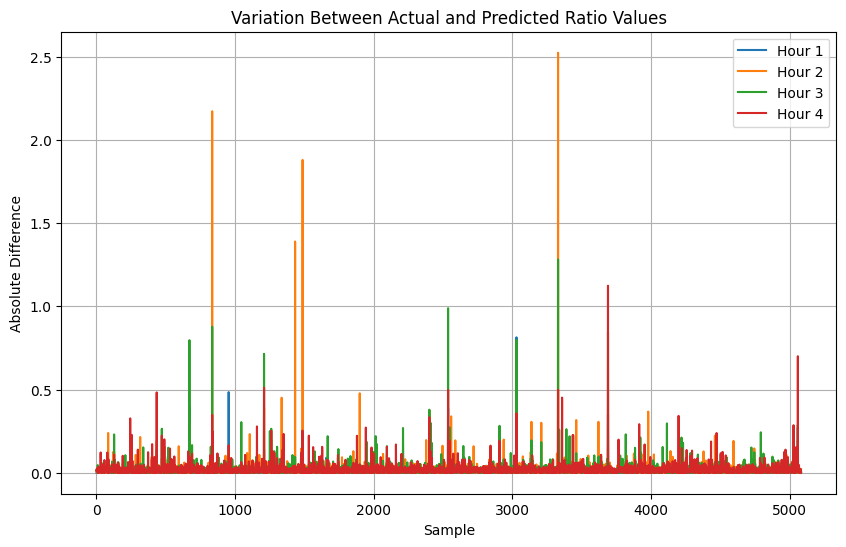

In [ ]:
absolute_difference_values = []
for i in range(5):
    absolute_difference = np.abs(y_test.iloc[:, i] - predictions[i])
    absolute_difference_values.append(absolute_difference)

# Create a line plot to visualize the variation in the absolute difference values
plt.figure(figsize=(10, 6))
hours_range = np.arange(1, y_test.shape[0]+1)  # Adjust the range based on the shape of y_test
for i in range(4):
    plt.plot(hours_range, absolute_difference_values[i], label=f"Hour {i+1}")

plt.xlabel('Sample')
plt.ylabel('Absolute Difference')
plt.title('Variation Between Actual and Predicted Ratio Values')
plt.legend()
plt.grid(True)

# Save the plot to a file
plt.savefig('variation_plot.png')

# Display the plot
plt.show()

In [ ]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [ ]:
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [ ]:
from google.colab import files
pickle_file_path = 'model.pkl'
files.download(pickle_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>